<a href="https://colab.research.google.com/github/MathBioCU/WSINDy4Weather/blob/main/hdf5_to_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[dedalus docs](https://dedalus-project.readthedocs.io/en/latest/notebooks/dedalus_tutorial_4.html)

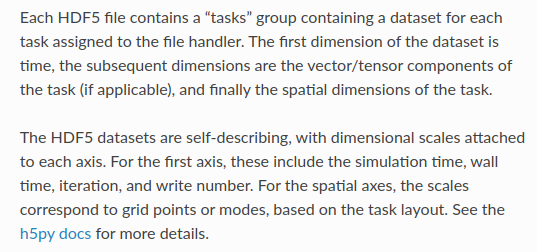

In [1]:
# Access your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directories
%cd /content/drive/My Drive/WSINDy/Dedalus

Mounted at /content/drive
/content/drive/My Drive/WSINDy/Dedalus


In [2]:
#%pip install h5py
import h5py

u = h5py.File('/content/drive/My Drive/WSINDy/Dedalus/prediction/snapshots_s1.h5','r')
[key for key in u.keys()]

['scales', 'tasks']

In [3]:
print([key for key in u['scales']])
print([key for key in u['tasks']])

['constant', 'iteration', 'phi_hash_4d9192b8da58dd3cdd4fc63aa3a8beac34bdb98f', 'sim_time', 'theta_hash_467dcee886afed0104e9f1277b56c612fe52d058', 'timestep', 'wall_time', 'write_number']
['height', 'vorticity']


In [7]:
# Write vorticity snapshots to a numpy array
vo_list = []

#for i in range(1,37): # Original simulation
for i in range(1,19): # Forecast
  file_path = 'prediction/snapshots_s'+str(i)+'.h5'
  with h5py.File(file_path, mode='r') as file:
    vo = file['tasks']['vorticity']
    for t in range(0,10):
      vo_list.append(vo[t,:,:])

print(f'Number of snapshots = {len(vo_list)}')

Number of snapshots = 180


In [8]:
print(vo_list[0].shape)
np.stack(vo_list, axis=-1).shape

(256, 128)


(256, 128, 180)

In [9]:
# # Reshape to 256 rows, 128*360 columns
vo_array = np.stack(vo_list, axis=-1)
print(vo_array.shape)
vo_csv = vo_array.reshape(256, -1)

# Export as csv
np.savetxt("prediction_vo.csv", vo_csv, delimiter=",")

(256, 128, 180)


In [11]:
# Write height snapshots to a numpy array
h_list = []

#for i in range(1,37): # Original simulation
for i in range(1,19): # Forecast
  file_path = 'prediction/snapshots_s'+str(i)+'.h5'
  with h5py.File(file_path, mode='r') as file:
    h = file['tasks']['height']
    for t in range(0,10):
      h_list.append(h[t,:,:])

print(f'Number of snapshots = {len(h_list)}')

Number of snapshots = 180


In [12]:
h_array = np.stack(h_list, axis=-1)
print(h_array.shape)
h_csv = h_array.reshape(256, -1)
np.savetxt("prediction_h.csv", h_csv, delimiter=",")

(256, 128, 180)


In [ ]:
# # Write to a numpy array
# #u_list = []
# #v_list = []
# #div_list = []
# advectu_list = []
# advectv_list = []
# hyperu_list = []
# hyperv_list = []
# coriolisu_list = []
# coriolisv_list = []
# gradu_list = []
# gradv_list = []

# for i in range(1,37):
#   file_path = 'h5_snapshots/snapshots_s'+str(i)+'.h5'
#   with h5py.File(file_path, mode='r') as file:
#     #u = file['tasks']['u']
#     #v = file['tasks']['u']
#     #div = file['tasks']['div(u)']
#     #div = file['tasks']['div(hu)']
#     advect = file['tasks']['advect(hu)']
#     hyper = file['tasks']['hyper(u)']
#     coriolis = file['tasks']['coriolis']
#     grad = file['tasks']['grad(h)']
#     for t in range(0,10):
#       #u_list.append(u[t,0,:,:])
#       #v_list.append(u[t,1,:,:])
#       #div_list.append(div[t,:,:])
#       advectu_list.append(advect[t,0,:,:])
#       advectv_list.append(advect[t,1,:,:])
#       hyperu_list.append(hyper[t,0,:,:])
#       hyperv_list.append(hyper[t,1,:,:])
#       coriolisu_list.append(coriolis[t,0,:,:])
#       coriolisv_list.append(coriolis[t,1,:,:])
#       gradu_list.append(grad[t,0,:,:])
#       gradv_list.append(grad[t,1,:,:])

# print(f'Number of snapshots = {len(hyperu_list)}')

In [ ]:
# #u_array = np.stack(u_list, axis=-1)
# #v_array = np.stack(v_list, axis=-1)
# #div_array = np.stack(div_list, axis=-1)
# advectu_array = np.stack(advectu_list, axis=-1)
# advectv_array = np.stack(advectv_list, axis=-1)
# hyperu_array = np.stack(hyperu_list, axis=-1)
# hyperv_array = np.stack(hyperv_list, axis=-1)
# coriolisu_array = np.stack(coriolisu_list, axis=-1)
# coriolisv_array = np.stack(coriolisv_list, axis=-1)
# gradu_array = np.stack(gradu_list, axis=-1)
# gradv_array = np.stack(gradv_list, axis=-1)

# #u_csv = u_array.reshape(256, -1)
# #v_csv = v_array.reshape(256, -1)
# #div_csv = div_array.reshape(256, -1)
# advectu_csv = advectu_array.reshape(256, -1)
# advectv_csv = advectv_array.reshape(256, -1)
# hyperu_csv = hyperu_array.reshape(256, -1)
# hyperv_csv = hyperv_array.reshape(256, -1)
# coriolisu_csv = coriolisu_array.reshape(256, -1)
# coriolisv_csv = coriolisv_array.reshape(256, -1)
# gradu_csv = gradu_array.reshape(256, -1)
# gradv_csv = gradv_array.reshape(256, -1)

# #np.savetxt("u.csv", u_csv, delimiter=",")
# #np.savetxt("v.csv", v_csv, delimiter=",")
# #np.savetxt("div.csv", div_csv, delimiter=",")
# #np.savetxt("total_div.csv", div_csv, delimiter=",")
# #np.savetxt("hyper_h.csv", hyper_csv, delimiter=",")
# np.savetxt("advect_u.csv", advectu_csv, delimiter=",")
# np.savetxt("advect_v.csv", advectv_csv, delimiter=",")
# np.savetxt("hyper_u.csv", hyperu_csv, delimiter=",")
# np.savetxt("hyper_v.csv", hyperv_csv, delimiter=",")
# np.savetxt("coriolis_u.csv", coriolisu_csv, delimiter=",")
# np.savetxt("coriolis_v.csv", coriolisv_csv, delimiter=",")
# np.savetxt("grad_u.csv", gradu_csv, delimiter=",")
# np.savetxt("grad_v.csv", gradv_csv, delimiter=",")

## Movies

In [ ]:
import numpy as np

In [ ]:
t = np.linspace(0., 359., 360)
x = np.linspace(0, 6.25864161, 256)
y = np.linspace(0.01871455, 3.12287811, 128)

In [ ]:
!pwd
!ls

/content/drive/MyDrive/WSINDy/Dedalus
ground_truth_h.csv   h5_snapshots	    prediction_h.csv   swe_video.mp4
ground_truth_vo.csv  height_comparison.mp4  prediction_vo.csv  vorticity_comparison.mp4


In [ ]:
import torch

# Import data
file_path = '/content/drive/My Drive/WSINDy'
H_true = np.loadtxt(file_path+'/Dedalus/ground_truth_h.csv', delimiter=',')
W_true = np.loadtxt(file_path+'/Dedalus/ground_truth_vo.csv', delimiter=',')
H_pred = np.loadtxt(file_path+'/Dedalus/prediction_h.csv', delimiter=',')
W_pred = np.loadtxt(file_path+'/Dedalus/prediction_vo.csv', delimiter=',')

H_true = torch.tensor(H_true)
W_true = torch.tensor(W_true)
H_pred = torch.tensor(H_pred)
W_pred = torch.tensor(W_pred)

# Reshape
(Nx, Ny) = (256, 128)
H_true = H_true.view(Nx, Ny, -1)
W_true = W_true.view(Nx, Ny, -1)
H_pred = H_pred.view(Nx, Ny, -1)
W_pred = W_pred.view(Nx, Ny, -1)

# Nump-ify
H_true = H_true.numpy()
W_true = W_true.numpy()
H_pred = H_pred.numpy()
W_pred = W_pred.numpy()

In [ ]:
H_pred.shape, H_true.shape

((256, 128, 180), (256, 128, 180))

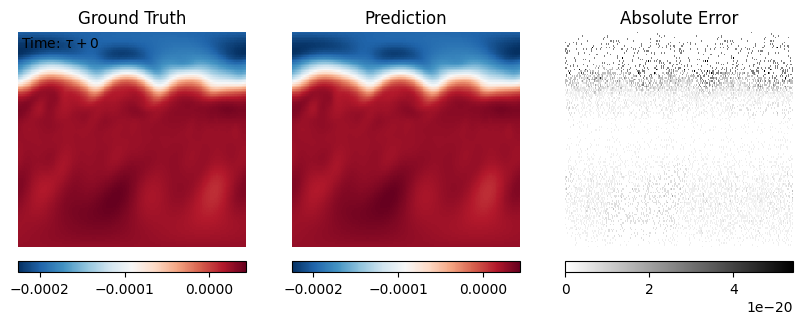

In [ ]:
# Make a movie?
import matplotlib.pyplot as plt

make_movie = True

def movie_update(t):
  pcm1.set_array(H_true[:,:,t].transpose(1,0).ravel())
  pcm2.set_array(H_pred[:,:,t].transpose(1,0).ravel())
  pcm3.set_array(abs(H_true-H_pred)[:,:,t].transpose(1,0).ravel())
  text.set_text(f'Time: $\\tau+{t}$')

  pcm1.set_clim(vmin=np.min(H_true[:,:,t]), vmax=np.max(H_true[:,:,t]))
  pcm2.set_clim(vmin=np.min(H_pred[:,:,t]), vmax=np.max(H_pred[:,:,t]))
  pcm3.set_clim(vmin=np.min(abs(H_true-H_pred)[:,:,t]), vmax=np.max(abs(H_true-H_pred)[:,:,t]))
  return [pcm1, pcm2, pcm3]

if make_movie:
  # Create a figure
  plt.rcParams['figure.figsize'] = [10, 3.5]
  fig, ax = plt.subplots(1,3)
  ax[0].set_axis_off()
  ax[1].set_axis_off()

  # Display the first frame
  pcm1 = ax[0].pcolormesh(x, y, H_true[:,:,0].transpose(1,0), cmap='RdBu_r')
  pcm2 = ax[1].pcolormesh(x, y, H_pred[:,:,0].transpose(1,0), cmap='RdBu_r')
  pcm3 = ax[2].pcolormesh(x, y, abs(H_true-H_pred)[:,:,0].transpose(1,0), cmap='binary')
  text = ax[0].text(0.08, 3.08, f'Time: $\\tau+{0}$', color='black', fontsize=10, ha='left', va='top')
  ax[0].set_title(f'Ground Truth')
  ax[1].set_title(f'Prediction')
  ax[2].set_title(f'Absolute Error')
  ax[2].axis('off')
  plt.colorbar(pcm1, orientation='horizontal', location='bottom', pad=0.05)
  plt.colorbar(pcm2, orientation='horizontal', location='bottom', pad=0.05)
  plt.colorbar(pcm3, orientation='horizontal', location='bottom', pad=0.05)
  plt.show()

  # Create and save movie
  #from matplotlib.animation import FuncAnimation
  #ani = FuncAnimation(fig, movie_update, frames=180, blit=True)
  #ani.save('height_comparison.mp4', writer='ffmpeg', fps=30, dpi=200)

In [ ]:
!pwd
!ls

/content/drive/My Drive/WSINDy/Dedalus
ground_truth_h.csv   h5_snapshots	    prediction_h.csv   swe_video.mp4
ground_truth_vo.csv  height_comparison.mp4  prediction_vo.csv  vorticity_comparison.mp4


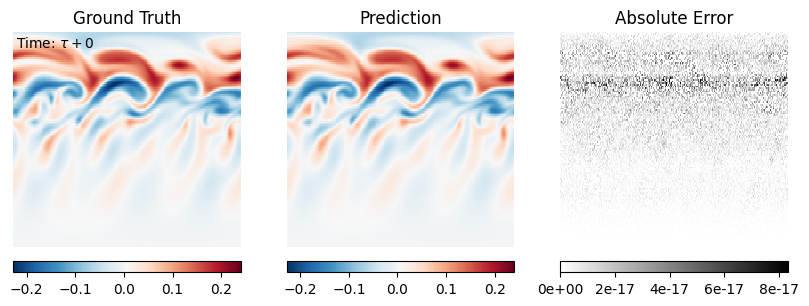

In [ ]:
# Make a movie?
make_movie = True

def movie_update(t):
  pcm1.set_array(W_true[:,:,t].transpose(1,0).ravel())
  pcm2.set_array(W_pred[:,:,t].transpose(1,0).ravel())
  pcm3.set_array(abs(W_true-W_pred)[:,:,t].transpose(1,0).ravel())
  text.set_text(f'Time: $\\tau+{t}$')

  pcm1.set_clim(vmin=np.min(W_true[:,:,t]), vmax=np.max(W_true[:,:,t]))
  pcm2.set_clim(vmin=np.min(W_pred[:,:,t]), vmax=np.max(W_pred[:,:,t]))
  pcm3.set_clim(vmin=np.min(abs(W_true-W_pred)[:,:,t]), vmax=np.max(abs(W_true-W_pred)[:,:,t]))
  return [pcm1, pcm2, pcm3]

if make_movie:
  # Create a figure
  plt.rcParams['figure.figsize'] = [10, 3.5]
  fig, ax = plt.subplots(1,3)
  ax[0].set_axis_off()
  ax[1].set_axis_off()

  # Display the first frame
  pcm1 = ax[0].pcolormesh(x, y, W_true[:,:,0].transpose(1,0), cmap='RdBu_r')
  pcm2 = ax[1].pcolormesh(x, y, W_pred[:,:,0].transpose(1,0), cmap='RdBu_r')
  pcm3 = ax[2].pcolormesh(x, y, abs(W_true-W_pred)[:,:,0].transpose(1,0), cmap='binary')
  text = ax[0].text(0.08, 3.08, f'Time: $\\tau+{0}$', color='black', fontsize=10, ha='left', va='top')
  ax[0].set_title(f'Ground Truth')
  ax[1].set_title(f'Prediction')
  ax[2].set_title(f'Absolute Error')
  ax[2].axis('off')
  plt.colorbar(pcm1, orientation='horizontal', location='bottom', pad=0.05)
  plt.colorbar(pcm2, orientation='horizontal', location='bottom', pad=0.05)
  plt.colorbar(pcm3, orientation='horizontal', location='bottom', pad=0.05, format='%1.e')
  plt.show()

  # Create and save movie
  from matplotlib.animation import FuncAnimation
  ani = FuncAnimation(fig, movie_update, frames=180, blit=True)
  ani.save('vorticity_comparison.mp4', writer='ffmpeg', fps=30, dpi=200)

In [ ]:
# Function to update the surface plots for each time step
def movie_update(t):
  # Update the data for each time step t
  data1 = (np.flip(W_true, axis=1))[:,:,2*t]
  data2 = (np.flip(W_pred, axis=1))[:,:,2*t]
  data3 = (np.flip(abs(W_true-W_pred), axis=1))[:,:,2*t]
  data4 = (np.flip(H_true, axis=1))[:,:,2*t]
  data5 = (np.flip(H_pred, axis=1))[:,:,2*t]
  data6 = (np.flip(abs(H_true-H_pred), axis=1))[:,:,2*t]

  # This shiz
  clim1 = np.max(np.abs(data1))
  clim2 = np.max(np.abs(data2))
  clim3 = np.max(np.abs(data3))
  clim6 = np.max(np.abs(data6))
  norm1 = matplotlib.colors.Normalize(-clim1, clim1)
  norm2 = matplotlib.colors.Normalize(-clim2, clim2)
  norm3 = matplotlib.colors.Normalize(0, clim3)
  norm4 = matplotlib.colors.Normalize(data4.min(), data4.max())
  norm5 = matplotlib.colors.Normalize(data5.min(), data5.max())
  norm6 = matplotlib.colors.Normalize(0, clim6)

  # Update the facecolors of each surface
  fc1 = cmap(norm1(data1))
  fc2 = cmap(norm2(data2))
  fc3 = cmap_error(norm3(data3))
  fc4 = cmap(norm4(data4))
  fc5 = cmap(norm5(data5))
  fc6 = cmap_error(norm6(data6))

  # Reshape the facecolors to match the surface dimensions (needed for plot_surface)
  surf1.set_facecolors(fc1.reshape(-1, 4))  # Flatten to 2D array of RGBA values
  surf2.set_facecolors(fc2.reshape(-1, 4))
  surf3.set_facecolors(fc3.reshape(-1, 4))
  surf4.set_facecolors(fc4.reshape(-1, 4))
  surf5.set_facecolors(fc5.reshape(-1, 4))
  surf6.set_facecolors(fc6.reshape(-1, 4))

  # Update the time label
  text.set_text(f'Time: $\\tau+{2*t}$')

  return surf1, surf2, surf3, surf4, surf5, surf6, text

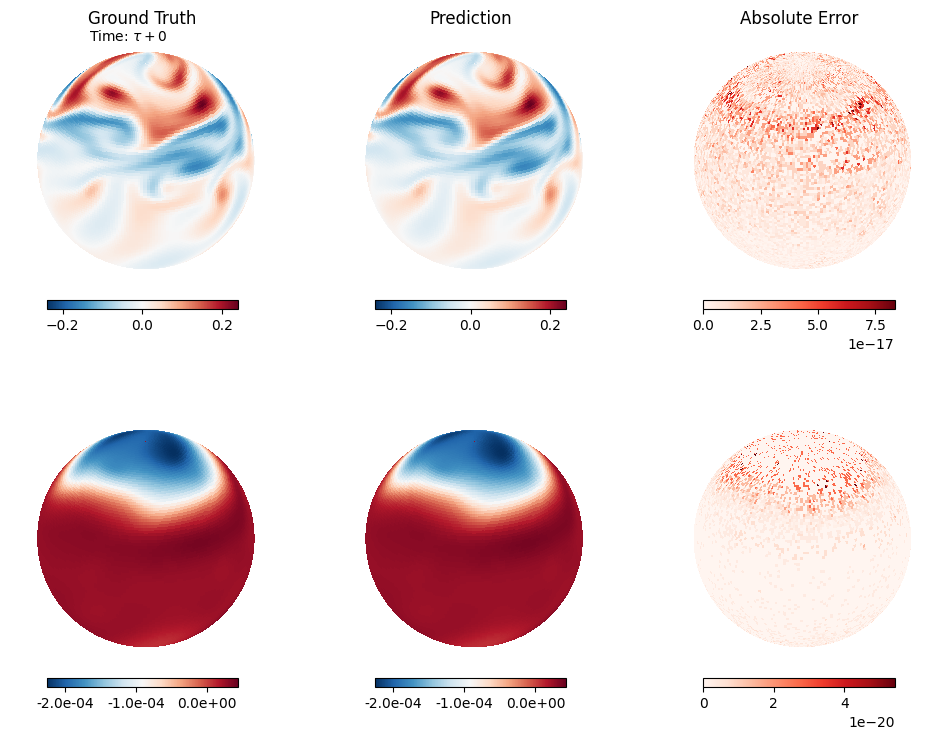

In [ ]:
# SPHERE PLOT
import h5py
import numpy as np
import matplotlib
#matplotlib.use('Agg') # high quality renderer, can only write to files
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def build_s2_coord_vertices(phi, theta):
  phi = phi.ravel()
  phi_vert = np.concatenate([phi, [2*np.pi]])
  phi_vert -= phi_vert[1] / 2
  theta = theta.ravel()
  theta_mid = (theta[:-1] + theta[1:]) / 2
  theta_vert = np.concatenate([[np.pi], theta_mid, [0]])
  return np.meshgrid(phi_vert, theta_vert, indexing='ij')

# Make a movie?
make_movie = True

if make_movie:
  # Parameterized surface
  phi_vert, theta_vert = build_s2_coord_vertices(x, y)
  X = np.sin(theta_vert) * np.cos(phi_vert)
  Y = np.sin(theta_vert) * np.sin(phi_vert)
  Z = np.cos(theta_vert)

  # Create figure
  fig, ax = plt.subplots(2, 3, figsize=(12, 9), subplot_kw={'projection': '3d'})
  (ax1,ax2,ax3) = ax[0,:]
  (ax4,ax5,ax6) = ax[1,:]
  cmap = plt.cm.RdBu_r
  cmap_error = plt.cm.Reds

  # Data
  data1 = (np.flip(W_true, axis=1))[:,:,0]
  data2 = (np.flip(W_pred, axis=1))[:,:,0]
  data3 = (np.flip(abs(W_true-W_pred), axis=1))[:,:,0]

  data4 = (np.flip(H_true, axis=1))[:,:,0]
  data5 = (np.flip(H_pred, axis=1))[:,:,0]
  data6 = (np.flip(abs(H_true-H_pred), axis=1))[:,:,0]

  clim1 = np.max(np.abs(data1))
  clim2 = np.max(np.abs(data2))
  clim3 = np.max(np.abs(data3))
  clim6 = np.max(np.abs(data6))
  norm1 = matplotlib.colors.Normalize(-clim1, clim1)
  norm2 = matplotlib.colors.Normalize(-clim2, clim2)
  norm3 = matplotlib.colors.Normalize(0, clim3)
  norm4 = matplotlib.colors.Normalize(data4.min(), data4.max())
  norm5 = matplotlib.colors.Normalize(data5.min(), data5.max())
  norm6 = matplotlib.colors.Normalize(0, clim6)
  fc1 = cmap(norm1(data1))
  fc2 = cmap(norm2(data2))
  fc3 = cmap_error(norm3(data3))
  fc4 = cmap(norm4(data4))
  fc5 = cmap(norm5(data5))
  fc6 = cmap_error(norm6(data6))

  # Plot scalar fields on sphere
  surf1 = ax1.plot_surface(X, Y, Z, facecolors=fc1, cstride=1, rstride=1, linewidth=0, antialiased=False, shade=False, zorder=5)
  surf2 = ax2.plot_surface(X, Y, Z, facecolors=fc2, cstride=1, rstride=1, linewidth=0, antialiased=False, shade=False, zorder=5)
  surf3 = ax3.plot_surface(X, Y, Z, facecolors=fc3, cstride=1, rstride=1, linewidth=0, antialiased=False, shade=False, zorder=5)
  text = ax1.text(-2, 2.2, 0, f'Time: $\\tau+{0}$', color='black', fontsize=10, ha='left', va='top')

  surf4 = ax4.plot_surface(X, Y, Z, facecolors=fc4, cstride=1, rstride=1, linewidth=0, antialiased=False, shade=False, zorder=5)
  surf5 = ax5.plot_surface(X, Y, Z, facecolors=fc5, cstride=1, rstride=1, linewidth=0, antialiased=False, shade=False, zorder=5)
  surf6 = ax6.plot_surface(X, Y, Z, facecolors=fc6, cstride=1, rstride=1, linewidth=0, antialiased=False, shade=False, zorder=5)

  # Add colorbars for each axis
  mappable1 = plt.cm.ScalarMappable(norm=norm1, cmap=cmap)
  mappable1.set_array(data1)
  fig.colorbar(mappable1, ax=ax1, orientation='horizontal', shrink=0.7, location='bottom', pad=0.01)
  mappable2 = plt.cm.ScalarMappable(norm=norm2, cmap=cmap)
  mappable2.set_array(data2)
  fig.colorbar(mappable2, ax=ax2, orientation='horizontal', shrink=0.7, location='bottom', pad=0.01)
  mappable3 = plt.cm.ScalarMappable(norm=norm3, cmap=cmap_error)
  mappable3.set_array(data3)
  fig.colorbar(mappable3, ax=ax3, orientation='horizontal', shrink=0.7, location='bottom', pad=0.01)

  mappable4 = plt.cm.ScalarMappable(norm=norm4, cmap=cmap)
  mappable4.set_array(data4)
  fig.colorbar(mappable4, ax=ax4, orientation='horizontal', shrink=0.7, location='bottom', pad=0.01, format='%.1e')
  mappable5 = plt.cm.ScalarMappable(norm=norm5, cmap=cmap)
  mappable5.set_array(data5)
  fig.colorbar(mappable5, ax=ax5, orientation='horizontal', shrink=0.7, location='bottom', pad=0.01, format='%.1e')
  mappable6 = plt.cm.ScalarMappable(norm=norm6, cmap=cmap_error)
  mappable6.set_array(data6)
  fig.colorbar(mappable6, ax=ax6, orientation='horizontal', shrink=0.7, location='bottom', pad=0.01)

  ax1.set_box_aspect((1,1,1))
  ax1.set_xlim(-0.7, 0.7)
  ax1.set_ylim(-0.7, 0.7)
  ax1.set_zlim(-0.7, 0.7)
  ax1.axis('off')
  ax1.set_title('Ground Truth')

  ax2.set_box_aspect((1,1,1))
  ax2.set_xlim(-0.7, 0.7)
  ax2.set_ylim(-0.7, 0.7)
  ax2.set_zlim(-0.7, 0.7)
  ax2.axis('off')
  ax2.set_title('Prediction')

  ax3.set_box_aspect((1,1,1))
  ax3.set_xlim(-0.7, 0.7)
  ax3.set_ylim(-0.7, 0.7)
  ax3.set_zlim(-0.7, 0.7)
  ax3.axis('off')
  ax3.set_title('Absolute Error')

  ax4.set_box_aspect((1,1,1))
  ax4.set_xlim(-0.7, 0.7)
  ax4.set_ylim(-0.7, 0.7)
  ax4.set_zlim(-0.7, 0.7)
  ax4.axis('off')

  ax5.set_box_aspect((1,1,1))
  ax5.set_xlim(-0.7, 0.7)
  ax5.set_ylim(-0.7, 0.7)
  ax5.set_zlim(-0.7, 0.7)
  ax5.axis('off')

  ax6.set_box_aspect((1,1,1))
  ax6.set_xlim(-0.7, 0.7)
  ax6.set_ylim(-0.7, 0.7)
  ax6.set_zlim(-0.7, 0.7)
  ax6.axis('off')

  plt.show()

  # Create and save movie
  from matplotlib.animation import FuncAnimation
  ani = FuncAnimation(fig, movie_update, frames=90, blit=True)
  ani.save('sphere_comparison.mp4', writer='ffmpeg', fps=30, dpi=200)

## Printed $x, y, t$

In [ ]:
with h5py.File("h5_snapshots/snapshots_s36.h5", mode='r') as file:
  # Load datasets
  vo = file['tasks']['vorticity']

  t = vo.dims[0]['sim_time']
  print(f't has shape = {t.shape}')
  #print(t[:])

  # x (phi) goes from 0 to 2pi
  x = vo.dims[1][0]
  print(f'x has shape = {x.shape}')
  #print(x[:])

  # y (theta) goes from pi to 0
  y = vo.dims[2][0]
  print(f'y has shape = {y.shape}')
  #print(np.flip(y[:],0))

t has shape = (10,)
x has shape = (256,)
y has shape = (128,)


In [ ]:
t = np.linspace(0., 359., 360)
x = np.linspace(0, 6.25864161, 256)
y = np.linspace(0.01871455, 3.12287811, 128)

## Dedalus sphere plot

In [ ]:
import h5py
import numpy as np
import matplotlib
#matplotlib.use('Agg') # high quality renderer, can only write to files
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def build_s2_coord_vertices(phi, theta):
  phi = phi.ravel()
  phi_vert = np.concatenate([phi, [2*np.pi]])
  phi_vert -= phi_vert[1] / 2
  theta = theta.ravel()
  theta_mid = (theta[:-1] + theta[1:]) / 2
  theta_vert = np.concatenate([[np.pi], theta_mid, [0]])
  return np.meshgrid(phi_vert, theta_vert, indexing='ij')


def sphere_plot(filename, start, count, output):
  """Save plot of specified tasks for given range of analysis writes."""
  # Plot settings
  task = 'vorticity'
  cmap = plt.cm.RdBu_r
  dpi = 100
  figsize = (8, 8)
  #savename_func = lambda write: 'write_{:06}.png'.format(write)
  # Create figure
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1], projection='3d')
  # Plot writes
  with h5py.File(filename, mode='r') as file:
    dset = file['tasks'][task]
    phi = dset.dims[1][0][:].ravel()
    theta = dset.dims[2][0][:].ravel()
    phi_vert, theta_vert = build_s2_coord_vertices(phi, theta)
    x = np.sin(theta_vert) * np.cos(phi_vert)
    y = np.sin(theta_vert) * np.sin(phi_vert)
    z = np.cos(theta_vert)
    for index in range(start, start+count):
      data_slices = (index, slice(None), slice(None))
      data = dset[data_slices]
      clim = np.max(np.abs(data))
      norm = matplotlib.colors.Normalize(-clim, clim)
      fc = cmap(norm(data))
      #fc[:, theta.size//2, :] = [0,0,0,1]  # black equator
      if index == start:
        surf = ax.plot_surface(x, y, z, facecolors=fc, cstride=1, rstride=1, linewidth=0, antialiased=False, shade=False, zorder=5)
        ax.set_box_aspect((1,1,1))
        ax.set_xlim(-0.7, 0.7)
        ax.set_ylim(-0.7, 0.7)
        ax.set_zlim(-0.7, 0.7)
        ax.axis('off')
      else:
        surf.set_facecolors(fc.reshape(fc.size//4, 4))
    plt.show()
      # Save figure
      #savename = savename_func(file['scales/write_number'][index])
      #savepath = output.joinpath(savename)
      #fig.savefig(str(savepath), dpi=dpi)
  #plt.close(fig)

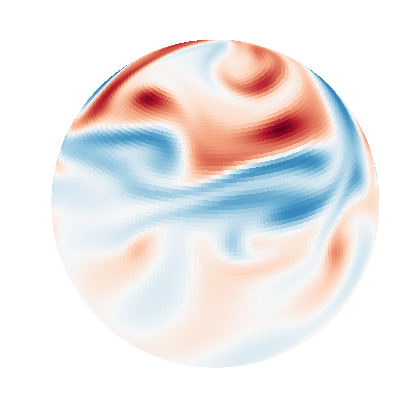

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')

with h5py.File('snapshots_s36.h5', mode='r') as file:
  dset = file['tasks']['vorticity']
  phi = dset.dims[1][0][:].ravel()
  theta = dset.dims[2][0][:].ravel()
  phi_vert, theta_vert = build_s2_coord_vertices(phi, theta)
  x = np.sin(theta_vert) * np.cos(phi_vert)
  y = np.sin(theta_vert) * np.sin(phi_vert)
  z = np.cos(theta_vert)
  data_slices = (0, slice(None), slice(None))
  data = dset[data_slices]
  clim = np.max(np.abs(data))
  norm = matplotlib.colors.Normalize(-clim, clim)
  fc = plt.cm.RdBu_r(norm(data))
  #fc[:, theta.size//2, :] = [0,0,0,1]  # black equator
  surf = ax.plot_surface(x, y, z, facecolors=fc, cstride=1, rstride=1, linewidth=0, antialiased=False, shade=False, zorder=5)
  ax.set_box_aspect((1,1,1))
  ax.set_xlim(-0.7, 0.7)
  ax.set_ylim(-0.7, 0.7)
  ax.set_zlim(-0.7, 0.7)
  ax.axis('off')
  plt.show()